In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
daily_asds = pd.read_csv('../data/Daily ASDS 2018-2023 for South San Francisco San Bruno.csv')
hourly_asds = pd.read_csv('../data/Hourly ASDS 2018-2023 for South San Francisco San Bruno.csv')
metadata = pd.read_csv('../data/ASDS 2018-2023 for South San Francisco and San Bruno Metadata.csv')

In [4]:
daily_asds['Site_ID'].unique()

array([ 20737,  21427,  38589,  60171,  65711,  67263,  67419,  68487,
        69403,  70569,  70679,  76803,  78387,  81205,  86761,  90215,
        91617,  94137, 104538, 107708, 109506, 109718, 111235, 111498,
       113144, 119179, 120937, 131431, 131435, 144654, 158239, 158259,
       160983, 169967, 177521], dtype=int64)

In [4]:
metadata

,Site_ID,Date_Created,Site_Name,Model,Hardware,Firmware_Version,Firmware_Upgrade,Latitude,Longitude,Elevation,County,Geohash_4,Geohash_5,Geohash_6,Geohash_7,Imposter_Sensors,Indoor_Sensors,Problematic_Sensors,geometry
0,20737,12/5/18 12:24,AZ South San Francisco,PA-II,2.0+BME280+PMSX003-B+PMSX003-A,7.02,NaN,37.664036,-122.396220,20,San Mateo,9q8y,9q8yq,9q8yqb,9q8yqb9,False,False,False,POINT (-122.39622 37.664036)
1,21427,12/11/18 12:53,Grundy Park,PA-II,2.0+BME280+PMSX003-B+PMSX003-A,7.02,NaN,37.622585,-122.420970,86,San Mateo,9q8y,9q8yn,9q8yn0,9q8yn0z,False,False,False,POINT (-122.42097 37.622585)
2,38589,8/29/19 8:32,Sign Hill,PA-II,2.0+BME280+PMSX003-B+PMSX003-A,7.02,NaN,37.665333,-122.416480,261,San Mateo,9q8y,9q8yq,9q8yq2,9q8yq2g,False,False,False,POINT (-122.41648 37.665333)
3,60171,7/23/20 14:31,South San Francisco Westborough Park,PA-II-SD,2.0+OPENLOG+NO-DISK+DS3231+BME280+PMSX003-B+PM...,7.02,NaN,37.643610,-122.458650,436,San Mateo,9q8y,9q8yj,9q8yjk,9q8yjku,False,False,False,POINT (-122.45865 37.64361)
4,65711,9/4/20 8:20,Commodore Dr,PA-II,2.0+BME280+PMSX003-B+PMSX003-A,7.02,NaN,37.633860,-122.423110,76,San Mateo,9q8y,9q8yn,9q8yn5,9q8yn5n,False,False,False,POINT (-122.42311 37.63386)
5,67263,9/9/20 13:27,Danger Stairs,PA-II,2.0+BME280+PMSX003-B+PMSX003-A,7.02,NaN,37.662823,-122.459570,168,San Mateo,9q8y,9q8ym,9q8ym2,9q8ym27,False,False,False,POINT (-122.45957 37.662823)
6,67419,9/10/20 7:45,Acacia And Crystal Springs,PA-II,2.0+BME280+PMSX003-B+PMSX003-A,7.02,NaN,37.618250,-122.413450,51,San Mateo,9q8y,9q8yn,9q8yn2,9q8yn2j,False,False,False,POINT (-122.41345 37.61825)
7,68487,9/14/20 11:40,Belle Air,PA-II,2.0+BME280+PMSX003-B+PMSX003-A,7.02,NaN,37.627250,-122.408950,12,San Mateo,9q8y,9q8yn,9q8yn9,9q8yn9b,False,False,False,POINT (-122.40895 37.62725)
8,69403,9/17/20 14:34,"Sunshine Gardens, SSF",PA-II,2.0+BME280+PMSX003-B+PMSX003-A,7.02,NaN,37.669600,-122.437970,164,San Mateo,9q8y,9q8ym,9q8ymc,9q8ymce,False,False,False,POINT (-122.43797 37.6696)
9,70569,9/22/20 9:18,Rollingwood / Palmhaus,PA-II,2.0+BME280+PMSX003-B+PMSX003-A,7.02,NaN,37.626810,-122.446540,545,San Mateo,9q8y,9q8yj,9q8yj9,9q8yj9v,False,False,False,POINT (-122.44654 37.62681)


In [5]:
hourly_asds['Site_ID'].unique()

array([ 20737,  21427,  38589,  60171,  65711,  67263,  67419,  68487,
        69403,  70569,  70679,  76803,  78387,  81205,  86761,  90215,
        91617,  94137, 104538, 107708, 109506, 109718, 111235, 111498,
       113144, 119179, 120937, 131431, 131435, 144654, 158239, 158259,
       160983, 169967, 177521], dtype=int64)

<Axes: xlabel='Hour'>

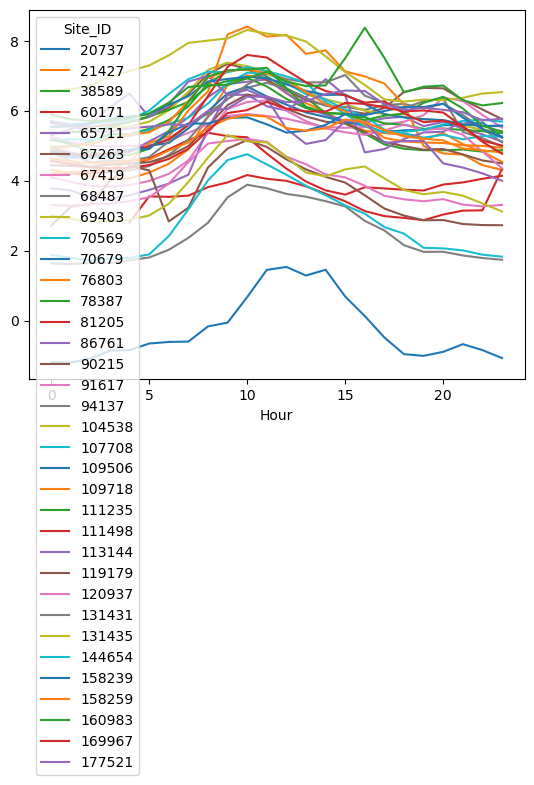

In [6]:
site = hourly_asds[['Site_ID', 'Hour', 'PM2.5_EPA']]
site_pivot = site.groupby(['Hour', 'Site_ID']).mean().reset_index().pivot(index='Hour', columns='Site_ID', values='PM2.5_EPA')
site_pivot.plot()

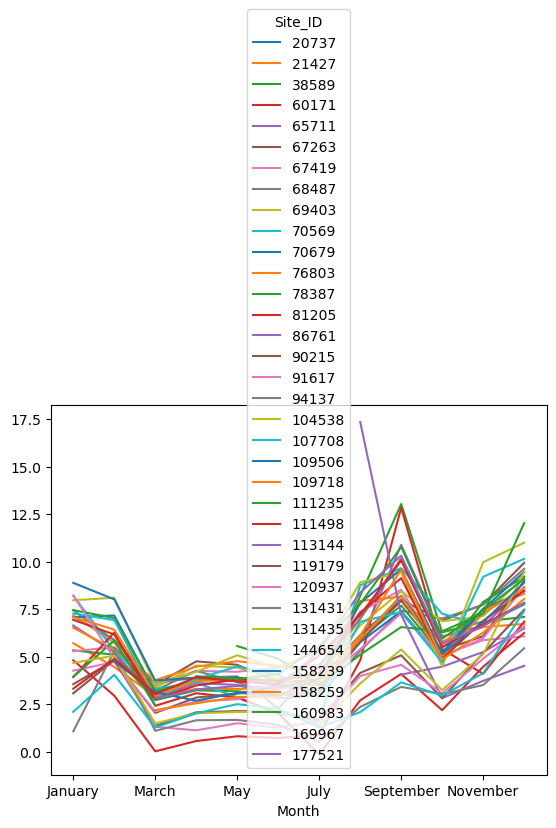

In [7]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

mappers = {}
mappers['Month'] = { i + 1 : month for i, month in enumerate(months) }

def get_timeseries(time_period, sites_data, mapper=None):
    if mapper is None:
        if time_period in mappers:
            mapper = mappers[time_period]
        else:
            mapper = lambda x: x
    
    sites = sites_data[['Site_ID', time_period, 'PM2.5_EPA']]
    sites_tseries = sites.groupby([time_period, 'Site_ID']).mean().reset_index()
    sites_tseries = sites_tseries.pivot(index=time_period, columns='Site_ID', values='PM2.5_EPA')
    sites_tseries = sites_tseries.rename(index=mappers['Month'])
    sites_tseries.set_index(sites_tseries.index.map(mapper))
    
    return sites_tseries

sites_pivot = get_timeseries('Month', daily_asds)
sites_pivot.plot()

sites_pivot = sites_pivot.rename(index=mappers['Month'])

<Axes: xlabel='Month', ylabel='Site_ID'>

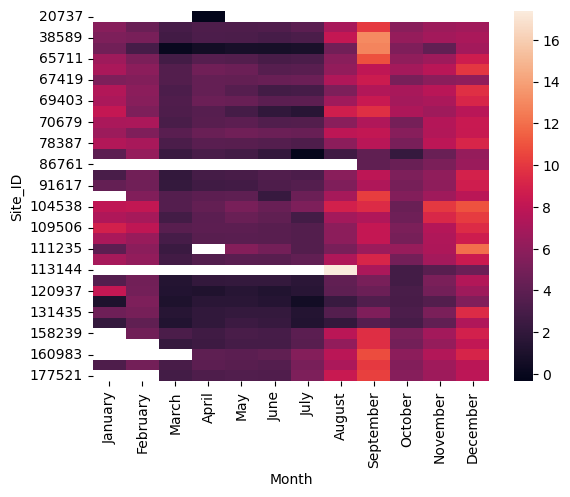

In [8]:
sns.heatmap(sites_pivot.T)

In [9]:
metadata[metadata["Site_ID"] == 65711][["Latitude", "Longitude"]]

,Latitude,Longitude
4,37.63386,-122.42311


In [10]:
sites_pivot

Site_ID,20737,21427,38589,60171,65711,67263,67419,68487,69403,70569,...,119179,120937,131431,131435,144654,158239,158259,160983,169967,177521
Month,,,,,,,,,,,,,,,,,,,,,
January,NaN,5.711316,5.334476,4.812810,6.641441,7.129609,5.282669,7.453500,7.182397,8.213751,...,3.550463,8.214268,1.067822,4.670933,2.091033,NaN,NaN,NaN,3.315821,NaN
February,NaN,4.456921,5.104348,2.947833,5.241844,5.888003,5.508032,5.852994,5.721712,5.320679,...,4.803701,4.916020,5.295085,5.056014,4.047011,4.756105,NaN,NaN,4.889294,NaN
March,NaN,2.924227,2.709327,0.013180,2.834476,3.502822,3.520875,3.226829,3.370402,3.308630,...,1.348058,1.308921,1.091597,1.486885,1.270142,3.123818,2.192610,NaN,3.027546,2.797694
April,-0.333099,3.298449,3.227083,0.556560,3.608473,4.754339,4.251061,4.248506,4.532298,3.620379,...,2.070997,1.120649,1.650599,2.016738,2.016885,2.682328,2.543561,3.966953,3.924414,3.276338
May,NaN,3.300791,3.177764,0.807037,3.514535,4.572531,4.204940,3.661673,4.428964,2.863513,...,2.132481,1.493166,1.668407,2.086539,2.500734,3.094424,2.876099,3.822915,3.697779,3.454083
June,NaN,3.356518,2.953571,0.716787,2.991550,3.632054,4.418957,2.807412,3.818514,2.003269,...,2.102931,1.253682,1.414762,2.109159,2.253684,2.959679,2.874253,4.088827,3.540555,3.390571
July,NaN,3.821165,3.154494,0.885877,3.141907,3.783059,4.569154,2.960767,3.928110,1.597474,...,1.674979,1.596626,0.496839,1.386837,1.270386,3.815884,3.730665,5.544656,5.070771,5.303137
August,NaN,7.038681,8.199405,4.805975,5.755860,6.136987,7.372365,5.304311,6.649715,8.755583,...,4.143848,3.980399,2.351229,3.589937,2.077802,7.821989,6.097439,7.778081,7.191132,8.378393
September,NaN,10.081242,13.040295,12.842580,10.891334,7.995785,8.515957,7.422147,8.440296,9.662147,...,5.071679,4.571580,3.408086,5.377011,3.648027,9.605868,9.605657,10.782718,10.075010,10.321902


<Axes: xlabel='Datetime', ylabel='Site_ID'>

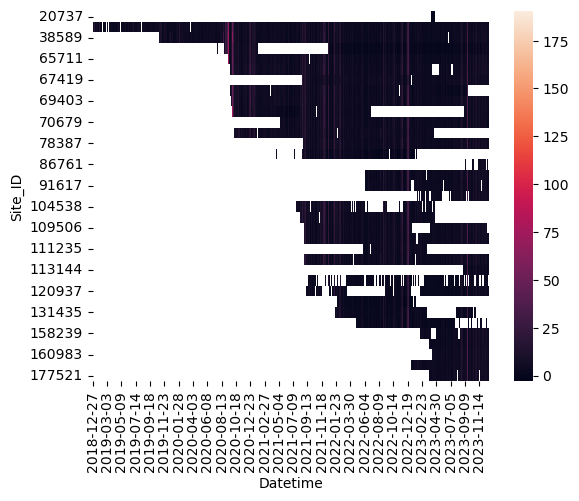

In [11]:
hourly_pm2 = get_timeseries('Datetime', daily_asds)
sns.heatmap(hourly_pm2.T)

c:\users\isaac\.pyenv\pyenv-win\versions\3.8.10\lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


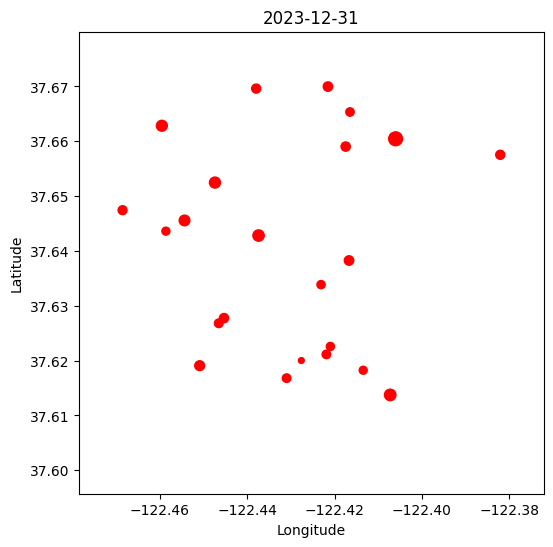

In [33]:
from matplotlib import animation

site_locations = metadata[["Site_ID", "Latitude", "Longitude"]].set_index('Site_ID')

hourly_pm2 = get_timeseries('Datetime', daily_asds)

fig, ax = plt.subplots(figsize=(6,6))

pad = 0.01
min_long = site_locations["Longitude"].min() - pad
max_long = site_locations["Longitude"].max() + pad
min_lat = site_locations["Latitude"].min() - pad
max_lat = site_locations["Latitude"].max() + pad

max_pm2 = hourly_pm2.max().max()
min_pm2 = hourly_pm2.min().min()

def init():
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    
def animate(t):
    ax.cla()
    
    ax.set_xlim(min_long, max_long)
    ax.set_ylim(min_lat, max_lat)
    
    ax.set_title(f"{hourly_pm2.index[t]}")
    
    ax.scatter(
        x=site_locations["Longitude"], 
        y=site_locations["Latitude"], 
        s=10*hourly_pm2.iloc[t], 
        color="Red"
    )


animate(400)
anim = animation.FuncAnimation(
    fig, 
    animate, 
    frames=len(hourly_pm2.index), 
    interval=30, 
    repeat=False, 
    init_func=init, 
    cache_frame_data=False
)

anim.save('../figures/Movie.mp4')

In [68]:
hourly_pm2

Site_ID,20737,21427,38589,60171,65711,67263,67419,68487,69403,70569,...,119179,120937,131431,131435,144654,158239,158259,160983,169967,177521
Datetime,,,,,,,,,,,,,,,,,,,,,
2018-12-27,NaN,2.999879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-28,NaN,3.857956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-29,NaN,4.176301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-30,NaN,5.093023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31,NaN,3.513953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,NaN,1.724641,1.679479,0.666909,3.073237,4.955116,3.424075,NaN,1.899201,0.566107,...,NaN,1.851974,NaN,NaN,NaN,3.161465,2.996255,2.978653,3.160157,1.800375
2023-12-28,NaN,4.595175,2.533695,3.691303,5.619716,5.577825,3.872925,NaN,5.084359,5.485125,...,NaN,3.976802,NaN,NaN,NaN,4.907223,5.505150,5.826531,6.881348,6.242467
2023-12-29,NaN,2.331104,1.204779,0.216131,2.952297,3.827075,3.243938,NaN,3.068454,0.731056,...,NaN,2.075286,NaN,NaN,-2.398517,3.053066,3.020257,3.129618,3.727226,2.210761


In [35]:
from census import Census
from us import states

CENSUS_KEY = '4d44b8d67afa803caa015e6449f42a84a44127c2'

c = Census(CENSUS_KEY)
ca = states.CA
#c.acs5.state_county_tract('S2701', states.CA.fips, )

In [36]:
ca_fips = '06'
smc_fips = '06081'
ssf_tracts = [
    '6001P',
    '6017',
    '6018P',
    '6019',
    '6020P',
    '6021',
    '6022',
    '6023P',
    '6024P',
    '6025',
    '6026',
    '6041.02P',
    '6042P'
]
sb_tracts = [
    '6023P',
    '6030P',
    '6035P',
    '6036P',
    '6037',
    '6038P',
    '6039P',
    '6040',
    '6041.01P',
    '6041.02P',
    '6042P',
    '6046P',
    '6135.01P'
]
tracts = ssf_tracts + sb_tracts

In [38]:
c.acs.get('B01001_004E', {'for': 'state:*'})

APIKeyError: ' <html style="font-size: 14px;">     <head>         <title>Invalid Key</title>         <link rel="icon" type="image/x-icon" href="favicon.ico">         <link rel="stylesheet" type="text/css" href="assets/styles.css">         <script type="text/javascript" src="assets/jquery-1.4.4.min.js"></script>         <script type="text/javascript">             $(document).ready(function() {                 $(".menu-activator").click(function() {                     $(".gov-menu").toggle()                     $(".chevron").toggleClass(\'rotate\')                 })                             })         </script>     </head>     <body>         <header>             <div data-v-8adc6fed="" data-v-2f72e816="" class="gov-banner noprint">                 <div data-v-8adc6fed="" class="aqua-layout horizontal align-start justify-start banner-header">                     <img data-v-8adc6fed="" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAALCAMAAABBPP0LAAAAG1BMVEUdM7EeNLIeM7HgQCDaPh/bPh/bPx/////bPyBEby41AAAAUElEQVQI123MNw4CABDEwD3jC/9/MQ1BQrgeOSkIqYe2o2FZtthXgQLgbHVMZdlsfUQFQnHtjP1+8BUhBDKOqtmfot6ojqPzR7TjdU+f6vkED+IDPhTBcMAAAAAASUVORK5CYII=" alt="U.S flag" class="usflag" role="img" aria-hidden="true">                     <span data-v-8adc6fed="">                         <div data-v-8adc6fed="" class="aqua-layout horizontal" tabindex="0">                             <div data-v-8adc6fed="" tabindex="0" aria-label="An official website of the United States government">                                  An official website of the United States government                              </div>                             <div data-v-8adc6fed="" class="menu-activator" aria-label="Here\'s how you know. Press enter for more information." tabindex="0">                                 <div data-v-8adc6fed="" class="aqua-layout horizontal justify-start"> Here&rsquo;s how you know <div data-v-8adc6fed="" class="chevron"><img  data-v-8adc6fed="" class="aqua-icon" src="assets/images/chevron-down.svg" style="width: 0.75rem; height: 0.75rem; max-height: 0.75rem; transition: all 500ms ease 0s; filter: invert(30%) sepia(8%) saturate(3837%) hue-rotate(171deg) brightness(99%) contrast(89%);"></div>                                 </div>                             </div>                         </div>                     </span>                 </div>                 <div data-v-8adc6fed="" class="aqua-layout horizontal justify-start gov-menu" style="display: none;"><div data-v-8adc6fed="" class="aqua-layout horizontal justify-start menu-paragraph"><img data-v-8adc6fed="" class="menu-svg" src="assets/images/icon-gov-building.svg" role="img" alt="government building image" aria-hidden="true"><div data-v-8adc6fed="" tabindex="0" aria-label="Official websites use .gov. A .gov website belongs to an official government                 organization in the United States."><strong data-v-8adc6fed=""> Official websites use .gov </strong>                 <br data-v-8adc6fed=""> A <strong data-v-8adc6fed="">.gov</strong> website belongs to an official government organization in the United States. </div>             </div>             <div data-v-8adc6fed="" class="aqua-layout horizontal justify-start menu-paragraph"><img data-v-8adc6fed="" class="menu-svg" src="assets/images/icon-lock.svg" role="img" alt="lock image" aria-hidden="true">                 <div data-v-8adc6fed="" tabindex="0" aria-label="Secure .gov websites use HTTPS. A lock or https:// means youâ\x80\x99ve safely connected to the                 .gov website. Share sensitive information only on official, secure                 websites."><strong data-v-8adc6fed=""> Secure .gov websites use HTTPS </strong>                 <br data-v-8adc6fed=""> A <strong data-v-8adc6fed="">lock</strong> ( <img data-v-8adc6fed="" class="menu-lock" src="assets/images/lock.svg" role="img" alt="lock image" aria-hidden="true"> ) or <strong data-v-8adc6fed="">https://</strong> means you&lsquo;ve safely connected to the .gov website. Share sensitive information only on official, secure websites. </div>             </div>         </div>     </div>     <div data-v-beed8774="" data-v-2f72e816="" role="banner" class="AppHeader noprint" aqua-relative="">         <div data-v-beed8774="" class="aqua-layout horizontal align-center justify-center"><!---->             <div data-v-beed8774="" class="aqua-flex" style="flex: 0 0 auto;">                 <div data-v-beed8774="" class="aqua-layout vertical">                     <div data-v-beed8774="" class="logoArea">                         <a data-v-fb9b02c5="" data-v-beed8774="" href="/" class="" id="census-home-link">                             <div data-v-fb9b02c5="" style="display: none;"></div>                             <img data-v-beed8774="" class="header-logo" src="assets/images/census-logo-gray.svg" alt="United States Census Bureau - Census Data Homepage">                         </a>                     </div>                 </div>             </div><!----><!---->             <div data-v-beed8774="" class="aqua-layout vertical"></div>         </div>     </div> </div> </header> <div class="flex-container content">     <div class="content-wrap center">         <h1>Invalid Key</h1>         <p>             A valid <em>key</em> must be included with each data API request.             You included a key with this request, however, it is not valid.             Please check your key and try again.         </p>         <p>             If you do not have a key you may sign up for one <a href="key_signup.html">here</a>.         </p>     </div>       </div>  <div data-v-56f1d3f7="" class="aqua-flex" style="flex: 0 0 auto;">     <footer data-v-db923c0a="" data-v-56f1d3f7="" class="PageFooter">         <div data-v-db923c0a="" class="aqua-layout align-center justify-center links aqua-text-caption">             <a data-v-db923c0a="" target="_blank" href="https://www.census.gov/about/policies/section-508.html">Accessibility</a>             <span data-v-db923c0a="" aria-hidden="true">&nbsp;|&nbsp;</span>             <a data-v-db923c0a="" target="_blank" href="https://www.census.gov/quality/">Information Quality</a>             <span data-v-db923c0a="" aria-hidden="true">&nbsp;|&nbsp;</span>             <a data-v-db923c0a="" target="_blank" href="https://www.census.gov/foia/">FOIA</a>             <span data-v-db923c0a="" aria-hidden="true">&nbsp;|&nbsp;</span>             <a data-v-db923c0a="" target="_blank" href="https://www.census.gov/privacy/">Data Protection and Privacy Policy</a>             <span data-v-db923c0a="" aria-hidden="true">&nbsp;|&nbsp;</span>             <a data-v-db923c0a="" target="_blank" href="https://www.commerce.gov/">U.S. Department of Commerce</a>             <span data-v-db923c0a="" aria-hidden="true">&nbsp;|&nbsp;</span>             <a data-v-db923c0a="" target="_blank" href="https://www2.census.gov/data/api-documentation/data-census-gov-release-notes.pdf?#">Release Notes</a>         </div>     </footer> </div>       </body> </html>'

In [37]:
c.acs5.get(('NAME', 'B25034_010E'),
          {'for': 'state:{}'.format(states.MD.fips)})

APIKeyError: ' <html style="font-size: 14px;">     <head>         <title>Invalid Key</title>         <link rel="icon" type="image/x-icon" href="favicon.ico">         <link rel="stylesheet" type="text/css" href="assets/styles.css">         <script type="text/javascript" src="assets/jquery-1.4.4.min.js"></script>         <script type="text/javascript">             $(document).ready(function() {                 $(".menu-activator").click(function() {                     $(".gov-menu").toggle()                     $(".chevron").toggleClass(\'rotate\')                 })                             })         </script>     </head>     <body>         <header>             <div data-v-8adc6fed="" data-v-2f72e816="" class="gov-banner noprint">                 <div data-v-8adc6fed="" class="aqua-layout horizontal align-start justify-start banner-header">                     <img data-v-8adc6fed="" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAALCAMAAABBPP0LAAAAG1BMVEUdM7EeNLIeM7HgQCDaPh/bPh/bPx/////bPyBEby41AAAAUElEQVQI123MNw4CABDEwD3jC/9/MQ1BQrgeOSkIqYe2o2FZtthXgQLgbHVMZdlsfUQFQnHtjP1+8BUhBDKOqtmfot6ojqPzR7TjdU+f6vkED+IDPhTBcMAAAAAASUVORK5CYII=" alt="U.S flag" class="usflag" role="img" aria-hidden="true">                     <span data-v-8adc6fed="">                         <div data-v-8adc6fed="" class="aqua-layout horizontal" tabindex="0">                             <div data-v-8adc6fed="" tabindex="0" aria-label="An official website of the United States government">                                  An official website of the United States government                              </div>                             <div data-v-8adc6fed="" class="menu-activator" aria-label="Here\'s how you know. Press enter for more information." tabindex="0">                                 <div data-v-8adc6fed="" class="aqua-layout horizontal justify-start"> Here&rsquo;s how you know <div data-v-8adc6fed="" class="chevron"><img  data-v-8adc6fed="" class="aqua-icon" src="assets/images/chevron-down.svg" style="width: 0.75rem; height: 0.75rem; max-height: 0.75rem; transition: all 500ms ease 0s; filter: invert(30%) sepia(8%) saturate(3837%) hue-rotate(171deg) brightness(99%) contrast(89%);"></div>                                 </div>                             </div>                         </div>                     </span>                 </div>                 <div data-v-8adc6fed="" class="aqua-layout horizontal justify-start gov-menu" style="display: none;"><div data-v-8adc6fed="" class="aqua-layout horizontal justify-start menu-paragraph"><img data-v-8adc6fed="" class="menu-svg" src="assets/images/icon-gov-building.svg" role="img" alt="government building image" aria-hidden="true"><div data-v-8adc6fed="" tabindex="0" aria-label="Official websites use .gov. A .gov website belongs to an official government                 organization in the United States."><strong data-v-8adc6fed=""> Official websites use .gov </strong>                 <br data-v-8adc6fed=""> A <strong data-v-8adc6fed="">.gov</strong> website belongs to an official government organization in the United States. </div>             </div>             <div data-v-8adc6fed="" class="aqua-layout horizontal justify-start menu-paragraph"><img data-v-8adc6fed="" class="menu-svg" src="assets/images/icon-lock.svg" role="img" alt="lock image" aria-hidden="true">                 <div data-v-8adc6fed="" tabindex="0" aria-label="Secure .gov websites use HTTPS. A lock or https:// means youâ\x80\x99ve safely connected to the                 .gov website. Share sensitive information only on official, secure                 websites."><strong data-v-8adc6fed=""> Secure .gov websites use HTTPS </strong>                 <br data-v-8adc6fed=""> A <strong data-v-8adc6fed="">lock</strong> ( <img data-v-8adc6fed="" class="menu-lock" src="assets/images/lock.svg" role="img" alt="lock image" aria-hidden="true"> ) or <strong data-v-8adc6fed="">https://</strong> means you&lsquo;ve safely connected to the .gov website. Share sensitive information only on official, secure websites. </div>             </div>         </div>     </div>     <div data-v-beed8774="" data-v-2f72e816="" role="banner" class="AppHeader noprint" aqua-relative="">         <div data-v-beed8774="" class="aqua-layout horizontal align-center justify-center"><!---->             <div data-v-beed8774="" class="aqua-flex" style="flex: 0 0 auto;">                 <div data-v-beed8774="" class="aqua-layout vertical">                     <div data-v-beed8774="" class="logoArea">                         <a data-v-fb9b02c5="" data-v-beed8774="" href="/" class="" id="census-home-link">                             <div data-v-fb9b02c5="" style="display: none;"></div>                             <img data-v-beed8774="" class="header-logo" src="assets/images/census-logo-gray.svg" alt="United States Census Bureau - Census Data Homepage">                         </a>                     </div>                 </div>             </div><!----><!---->             <div data-v-beed8774="" class="aqua-layout vertical"></div>         </div>     </div> </div> </header> <div class="flex-container content">     <div class="content-wrap center">         <h1>Invalid Key</h1>         <p>             A valid <em>key</em> must be included with each data API request.             You included a key with this request, however, it is not valid.             Please check your key and try again.         </p>         <p>             If you do not have a key you may sign up for one <a href="key_signup.html">here</a>.         </p>     </div>       </div>  <div data-v-56f1d3f7="" class="aqua-flex" style="flex: 0 0 auto;">     <footer data-v-db923c0a="" data-v-56f1d3f7="" class="PageFooter">         <div data-v-db923c0a="" class="aqua-layout align-center justify-center links aqua-text-caption">             <a data-v-db923c0a="" target="_blank" href="https://www.census.gov/about/policies/section-508.html">Accessibility</a>             <span data-v-db923c0a="" aria-hidden="true">&nbsp;|&nbsp;</span>             <a data-v-db923c0a="" target="_blank" href="https://www.census.gov/quality/">Information Quality</a>             <span data-v-db923c0a="" aria-hidden="true">&nbsp;|&nbsp;</span>             <a data-v-db923c0a="" target="_blank" href="https://www.census.gov/foia/">FOIA</a>             <span data-v-db923c0a="" aria-hidden="true">&nbsp;|&nbsp;</span>             <a data-v-db923c0a="" target="_blank" href="https://www.census.gov/privacy/">Data Protection and Privacy Policy</a>             <span data-v-db923c0a="" aria-hidden="true">&nbsp;|&nbsp;</span>             <a data-v-db923c0a="" target="_blank" href="https://www.commerce.gov/">U.S. Department of Commerce</a>             <span data-v-db923c0a="" aria-hidden="true">&nbsp;|&nbsp;</span>             <a data-v-db923c0a="" target="_blank" href="https://www2.census.gov/data/api-documentation/data-census-gov-release-notes.pdf?#">Release Notes</a>         </div>     </footer> </div>       </body> </html>'

In [32]:
c.acs5.state_county_tract('NAME', ca_fips, smc_fips, tracts)

APIKeyError: ' <html style="font-size: 14px;">     <head>         <title>Invalid Key</title>         <link rel="icon" type="image/x-icon" href="favicon.ico">         <link rel="stylesheet" type="text/css" href="assets/styles.css">         <script type="text/javascript" src="assets/jquery-1.4.4.min.js"></script>         <script type="text/javascript">             $(document).ready(function() {                 $(".menu-activator").click(function() {                     $(".gov-menu").toggle()                     $(".chevron").toggleClass(\'rotate\')                 })                             })         </script>     </head>     <body>         <header>             <div data-v-8adc6fed="" data-v-2f72e816="" class="gov-banner noprint">                 <div data-v-8adc6fed="" class="aqua-layout horizontal align-start justify-start banner-header">                     <img data-v-8adc6fed="" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAALCAMAAABBPP0LAAAAG1BMVEUdM7EeNLIeM7HgQCDaPh/bPh/bPx/////bPyBEby41AAAAUElEQVQI123MNw4CABDEwD3jC/9/MQ1BQrgeOSkIqYe2o2FZtthXgQLgbHVMZdlsfUQFQnHtjP1+8BUhBDKOqtmfot6ojqPzR7TjdU+f6vkED+IDPhTBcMAAAAAASUVORK5CYII=" alt="U.S flag" class="usflag" role="img" aria-hidden="true">                     <span data-v-8adc6fed="">                         <div data-v-8adc6fed="" class="aqua-layout horizontal" tabindex="0">                             <div data-v-8adc6fed="" tabindex="0" aria-label="An official website of the United States government">                                  An official website of the United States government                              </div>                             <div data-v-8adc6fed="" class="menu-activator" aria-label="Here\'s how you know. Press enter for more information." tabindex="0">                                 <div data-v-8adc6fed="" class="aqua-layout horizontal justify-start"> Here&rsquo;s how you know <div data-v-8adc6fed="" class="chevron"><img  data-v-8adc6fed="" class="aqua-icon" src="assets/images/chevron-down.svg" style="width: 0.75rem; height: 0.75rem; max-height: 0.75rem; transition: all 500ms ease 0s; filter: invert(30%) sepia(8%) saturate(3837%) hue-rotate(171deg) brightness(99%) contrast(89%);"></div>                                 </div>                             </div>                         </div>                     </span>                 </div>                 <div data-v-8adc6fed="" class="aqua-layout horizontal justify-start gov-menu" style="display: none;"><div data-v-8adc6fed="" class="aqua-layout horizontal justify-start menu-paragraph"><img data-v-8adc6fed="" class="menu-svg" src="assets/images/icon-gov-building.svg" role="img" alt="government building image" aria-hidden="true"><div data-v-8adc6fed="" tabindex="0" aria-label="Official websites use .gov. A .gov website belongs to an official government                 organization in the United States."><strong data-v-8adc6fed=""> Official websites use .gov </strong>                 <br data-v-8adc6fed=""> A <strong data-v-8adc6fed="">.gov</strong> website belongs to an official government organization in the United States. </div>             </div>             <div data-v-8adc6fed="" class="aqua-layout horizontal justify-start menu-paragraph"><img data-v-8adc6fed="" class="menu-svg" src="assets/images/icon-lock.svg" role="img" alt="lock image" aria-hidden="true">                 <div data-v-8adc6fed="" tabindex="0" aria-label="Secure .gov websites use HTTPS. A lock or https:// means youâ\x80\x99ve safely connected to the                 .gov website. Share sensitive information only on official, secure                 websites."><strong data-v-8adc6fed=""> Secure .gov websites use HTTPS </strong>                 <br data-v-8adc6fed=""> A <strong data-v-8adc6fed="">lock</strong> ( <img data-v-8adc6fed="" class="menu-lock" src="assets/images/lock.svg" role="img" alt="lock image" aria-hidden="true"> ) or <strong data-v-8adc6fed="">https://</strong> means you&lsquo;ve safely connected to the .gov website. Share sensitive information only on official, secure websites. </div>             </div>         </div>     </div>     <div data-v-beed8774="" data-v-2f72e816="" role="banner" class="AppHeader noprint" aqua-relative="">         <div data-v-beed8774="" class="aqua-layout horizontal align-center justify-center"><!---->             <div data-v-beed8774="" class="aqua-flex" style="flex: 0 0 auto;">                 <div data-v-beed8774="" class="aqua-layout vertical">                     <div data-v-beed8774="" class="logoArea">                         <a data-v-fb9b02c5="" data-v-beed8774="" href="/" class="" id="census-home-link">                             <div data-v-fb9b02c5="" style="display: none;"></div>                             <img data-v-beed8774="" class="header-logo" src="assets/images/census-logo-gray.svg" alt="United States Census Bureau - Census Data Homepage">                         </a>                     </div>                 </div>             </div><!----><!---->             <div data-v-beed8774="" class="aqua-layout vertical"></div>         </div>     </div> </div> </header> <div class="flex-container content">     <div class="content-wrap center">         <h1>Invalid Key</h1>         <p>             A valid <em>key</em> must be included with each data API request.             You included a key with this request, however, it is not valid.             Please check your key and try again.         </p>         <p>             If you do not have a key you may sign up for one <a href="key_signup.html">here</a>.         </p>     </div>       </div>  <div data-v-56f1d3f7="" class="aqua-flex" style="flex: 0 0 auto;">     <footer data-v-db923c0a="" data-v-56f1d3f7="" class="PageFooter">         <div data-v-db923c0a="" class="aqua-layout align-center justify-center links aqua-text-caption">             <a data-v-db923c0a="" target="_blank" href="https://www.census.gov/about/policies/section-508.html">Accessibility</a>             <span data-v-db923c0a="" aria-hidden="true">&nbsp;|&nbsp;</span>             <a data-v-db923c0a="" target="_blank" href="https://www.census.gov/quality/">Information Quality</a>             <span data-v-db923c0a="" aria-hidden="true">&nbsp;|&nbsp;</span>             <a data-v-db923c0a="" target="_blank" href="https://www.census.gov/foia/">FOIA</a>             <span data-v-db923c0a="" aria-hidden="true">&nbsp;|&nbsp;</span>             <a data-v-db923c0a="" target="_blank" href="https://www.census.gov/privacy/">Data Protection and Privacy Policy</a>             <span data-v-db923c0a="" aria-hidden="true">&nbsp;|&nbsp;</span>             <a data-v-db923c0a="" target="_blank" href="https://www.commerce.gov/">U.S. Department of Commerce</a>             <span data-v-db923c0a="" aria-hidden="true">&nbsp;|&nbsp;</span>             <a data-v-db923c0a="" target="_blank" href="https://www2.census.gov/data/api-documentation/data-census-gov-release-notes.pdf?#">Release Notes</a>         </div>     </footer> </div>       </body> </html>'